In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
mpg = sns.load_dataset("mpg")

# Explore the dataset
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


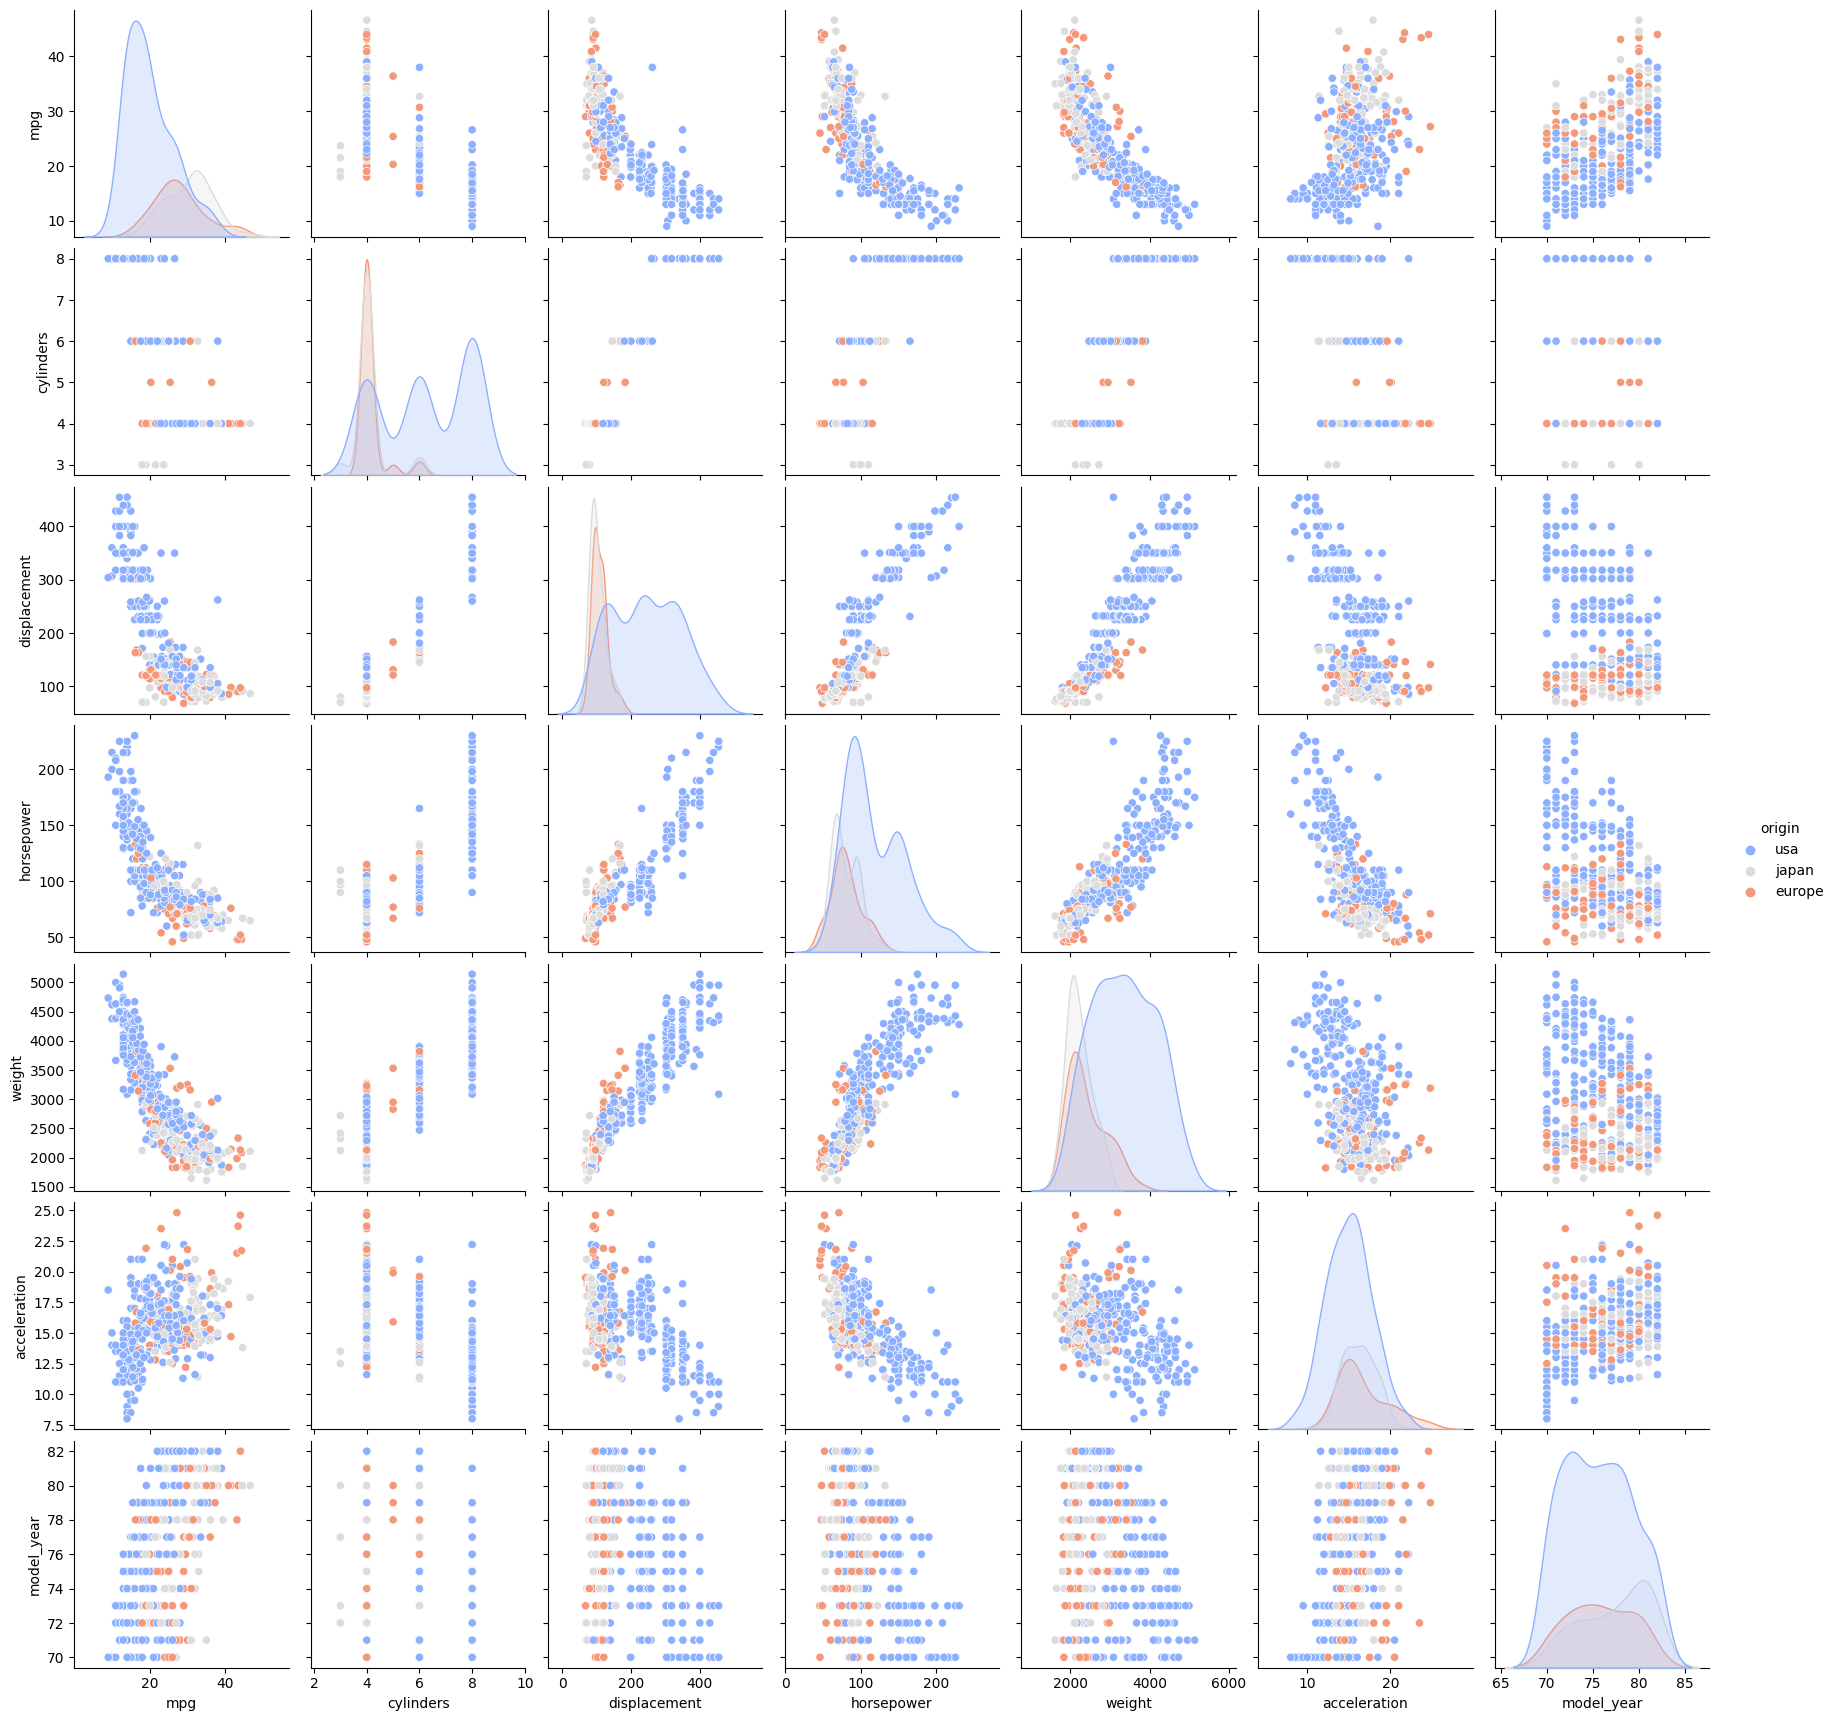

In [ ]:
# Data visualization
# Let's create three relevant graphs: pairplot, a scatter plot, and a boxplot.
sns.pairplot(mpg, hue='origin', palette='coolwarm')
plt.show()

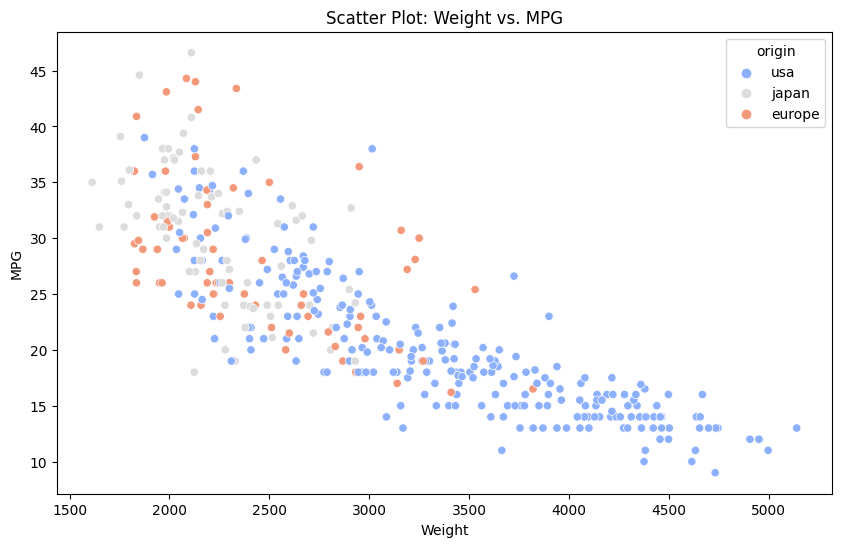

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='mpg', data=mpg, hue='origin', palette='coolwarm')
plt.title('Scatter Plot: Weight vs. MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()


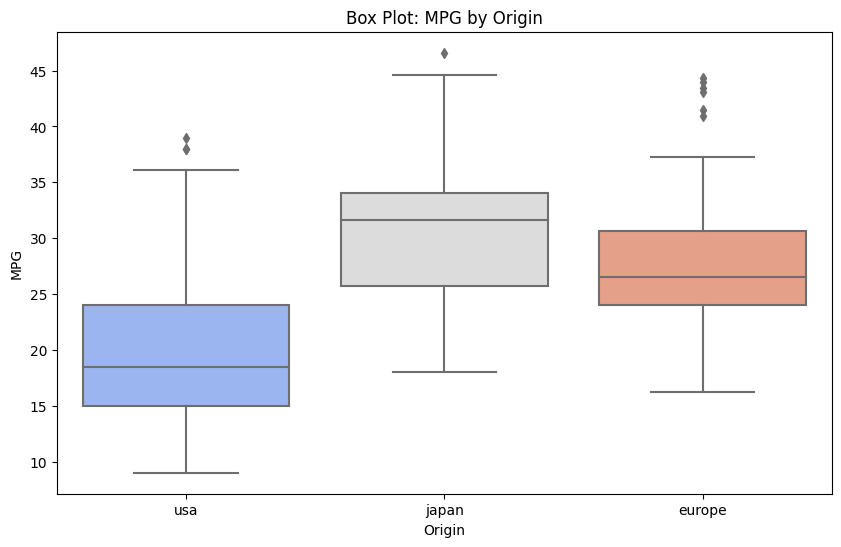

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='mpg', data=mpg, palette='coolwarm')
plt.title('Box Plot: MPG by Origin')
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.show()


In [ ]:
# Select features (predictors) and target variable
X = mpg[['weight']]  # Using weight as the predictor
y = mpg['mpg']  # Predicting MPG

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create polynomial features
degree = 2  # You can adjust the degree for higher-order polynomial regression
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data with polynomial features
model.fit(X_train_poly, y_train)

# Make predictions on the test data with polynomial features
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 13.150522130757171
R-squared: 0.7554139494160395


In [ ]:
# Create a function for prediction using the trained model
def predict_mpg(weight):
    """
    Predicts the MPG of a car using the trained polynomial regression model.

    Args:
        weight (float): Weight of the car.

    Returns:
        float: Predicted MPG.
    """
    features = np.array([[weight]])
    features_poly = poly.transform(features)
    predicted_mpg = model.predict(features_poly)
    return predicted_mpg[0]

# Example usage of the prediction function
predicted_mpg = predict_mpg(3000)
print("Predicted MPG:", predicted_mpg)


Predicted MPG: 22.171421731408323


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
